In [0]:
import numpy as np
import matplotlib.pyplot as plt 

import cv2

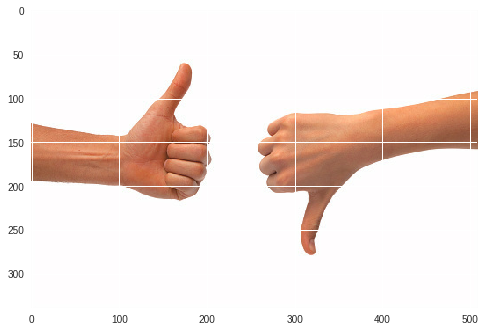

In [2]:
img = cv2.imread("thumbs_up_down.jpg")

img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

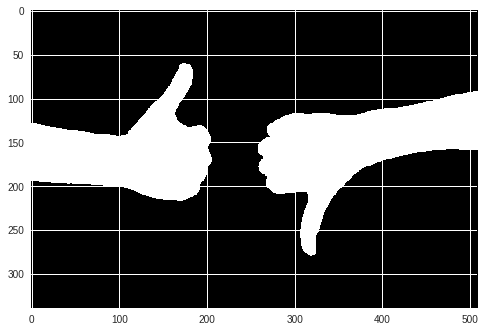

In [4]:
img_copy = np.copy(img)

img_gray = cv2.cvtColor(img_copy , cv2.COLOR_RGB2GRAY) 

img_blur = cv2.GaussianBlur( img_gray , (5,5) , 0)

ret , threshold = cv2.threshold( img_blur , 225 , 255 , cv2.THRESH_BINARY_INV)

plt.imshow(threshold , cmap = "gray")
plt.show()

 No of Contours :  2


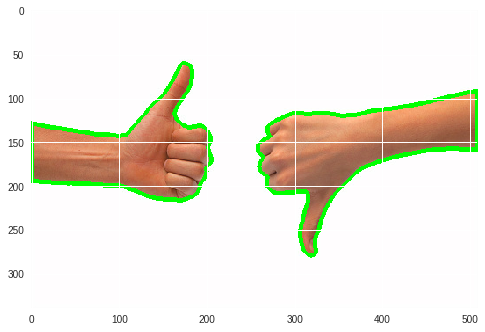

In [6]:
ret , contours , hierarchy = cv2.findContours(threshold , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)

img_cp = np.copy(img)

Contours_img = cv2.drawContours(img_cp , contours , -1 , (0,255,0) , 3)

print(" No of Contours : " ,  len(contours))

plt.imshow(Contours_img)
plt.show()

Consider the task is to find the hand which is pointing up 

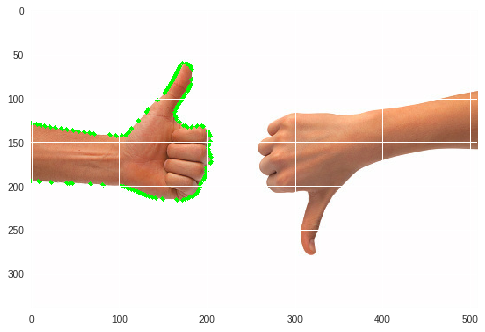

In [12]:
max_angle = -np.Inf
selected_contour = None

for contour in contours :
    (x , y) , (MA , ma) , angle = cv2.fitEllipse(contour)
    if angle > max_angle :
        max_angle = angle
        selected_contour = contour 
    
img_cp_2 = np.copy(img)

point_up = cv2.drawContours( img_cp_2 , selected_contour , -1 , (0 , 255 , 0) , 3 )

plt.imshow(point_up)
plt.show()